## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[133.75  89.75  88.75]
   [132.75  88.75  87.75]
   [138.75  94.75  93.75]
   ...
   [133.    88.    85.  ]
   [126.5   81.5   78.5 ]
   [123.    78.    75.  ]]

  [[138.5   94.5   93.5 ]
   [129.25  85.25  84.25]
   [131.25  87.25  86.25]
   ...
   [134.    89.    86.  ]
   [139.75  94.75  91.75]
   [134.5   89.5   86.5 ]]

  [[135.5   91.5   90.5 ]
   [136.5   92.5   91.5 ]
   [147.75 103.75 102.75]
   ...
   [127.    82.    79.  ]
   [133.75  88.75  85.75]
   [129.5   84.5   81.5 ]]

  ...

  [[172.75 134.75 133.75]
   [176.5  138.5  137.5 ]
   [174.75 136.75 135.75]
   ...
   [174.75 134.75 132.75]
   [170.25 130.25 128.25]
   [163.75 123.75 121.75]]

  [[177.   139.   138.  ]
   [178.5  140.5  139.5 ]
   [172.75 134.75 133.75]
   ...
   [179.   139.   137.  ]
   [175.75 135.75 133.75]
   [168.   128.   126.  ]]

  [[175.   137.   136.  ]
   [182.   144.   143.  ]
   [172.   134.   133.  ]
   ...
   [171.25 131.25 129.25]
   [169.   129.   127.  ]
   [163.75 123.75 12

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [14]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()

In [16]:
## Building Convolution Layer
cnn = tf.keras.models.Sequential()

In [17]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25)) # To avoid Overfitting - it is going to drop 25% of the neurons randomly

In [23]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4)) # To avoid Overfitting - it is going to drop 40% of the neurons randomly

In [26]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [27]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

### Model Training

In [29]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 1948s 886ms/step - loss: 1.5037 - accuracy: 0.5601 - val_loss: 0.7244 - val_accuracy: 0.7798
Epoch 2/10
2197/2197 [==============================] - 1893s 861ms/step - loss: 0.4918 - accuracy: 0.8440 - val_loss: 0.3229 - val_accuracy: 0.8952
Epoch 3/10
2197/2197 [==============================] - 1865s 849ms/step - loss: 0.2819 - accuracy: 0.9097 - val_loss: 0.2019 - val_accuracy: 0.9356
Epoch 4/10
2197/2197 [==============================] - 1879s 855ms/step - loss: 0.1908 - accuracy: 0.9377 - val_loss: 0.1967 - val_accuracy: 0.9361
Epoch 5/10
2197/2197 [==============================] - 1976s 899ms/step - loss: 0.1400 - accuracy: 0.9537 - val_loss: 0.1853 - val_accuracy: 0.9396
Epoch 6/10
2197/2197 [==============================] - 1831s 833ms/step - loss: 0.1083 - accuracy: 0.9645 - val_loss: 0.1247 - val_accuracy: 0.9599
Epoch 7/10
2197/2197 [==============================] - 1852s 843ms/step - loss: 0.0853 - accuracy: 0.97

## Model Evaluation

In [30]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 611s 278ms/step - loss: 0.0267 - accuracy: 0.9914


In [31]:
print(train_loss,train_acc)

0.026666011661291122 0.9913933873176575


In [32]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 132s 239ms/step - loss: 0.1144 - accuracy: 0.9670


In [33]:
print(val_loss,val_acc)

0.1143779307603836 0.9670498371124268


### Saving Model

In [34]:
model.save("trained_model.keras")

In [35]:
training_history.history

{'loss': [1.503746747970581,
  0.49177122116088867,
  0.2819448411464691,
  0.19077487289905548,
  0.13997025787830353,
  0.10832790285348892,
  0.08529074490070343,
  0.07429349422454834,
  0.06580822169780731,
  0.057664655148983],
 'accuracy': [0.5601251721382141,
  0.8439576029777527,
  0.9096664190292358,
  0.9376769065856934,
  0.9537236094474792,
  0.9645494222640991,
  0.9716338515281677,
  0.9753894209861755,
  0.9784906506538391,
  0.9812646508216858],
 'val_loss': [0.7244058847427368,
  0.32288044691085815,
  0.2018786072731018,
  0.19673334062099457,
  0.1852627545595169,
  0.12469150125980377,
  0.1227012425661087,
  0.12996627390384674,
  0.10709140449762344,
  0.11437790095806122],
 'val_accuracy': [0.7797632813453674,
  0.8952310681343079,
  0.9356362223625183,
  0.9361484050750732,
  0.9396198391914368,
  0.9598793387413025,
  0.9626678824424744,
  0.959822416305542,
  0.9687570929527283,
  0.9670498371124268]}

In [36]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [37]:
training_history.history['val_accuracy']

[0.7797632813453674,
 0.8952310681343079,
 0.9356362223625183,
 0.9361484050750732,
 0.9396198391914368,
 0.9598793387413025,
 0.9626678824424744,
 0.959822416305542,
 0.9687570929527283,
 0.9670498371124268]

### Accuracy Visualization

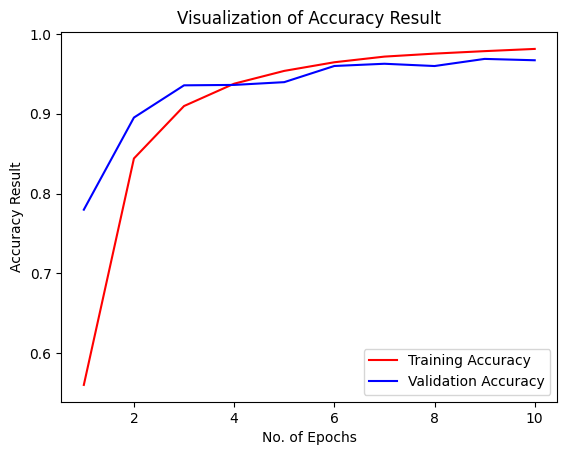

In [38]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [39]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [40]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [41]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 130s 237ms/step


(array([[9.9992812e-01, 3.2989046e-06, 1.0059648e-09, ..., 4.6339529e-14,
         3.4495813e-12, 3.2107653e-13],
        [9.9991333e-01, 1.2658340e-06, 8.3339922e-09, ..., 3.8466439e-12,
         1.9571423e-11, 1.2575854e-12],
        [9.9992883e-01, 3.6093304e-09, 1.7205709e-10, ..., 1.9033229e-16,
         2.5995338e-13, 2.6917472e-14],
        ...,
        [6.6479836e-11, 1.5409236e-12, 3.0944893e-08, ..., 2.6787839e-11,
         3.1195602e-10, 9.9999785e-01],
        [1.0984299e-10, 6.4186492e-13, 8.7346343e-09, ..., 3.7690193e-10,
         1.9890337e-10, 9.9999952e-01],
        [2.5045853e-19, 9.6175741e-22, 1.0648469e-17, ..., 7.7424379e-19,
         6.9087442e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [42]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [43]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [44]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [45]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

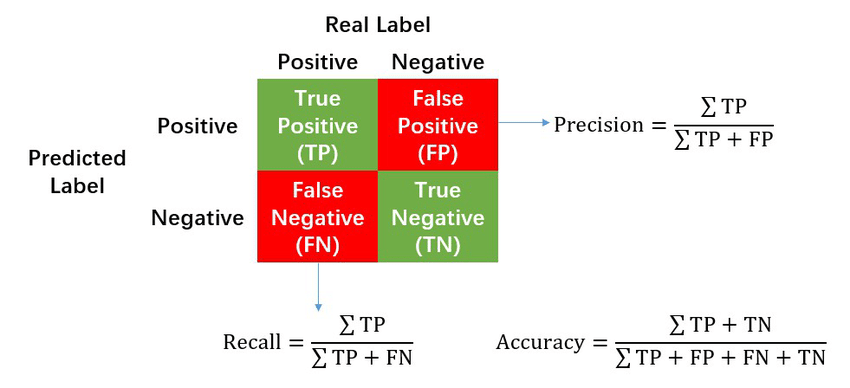

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.93      0.95       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.91      0.94       440
                                   Apple___healthy       0.99      0.93      0.96       502
                               Blueberry___healthy       0.96      0.97      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [48]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[469,   7,   0, ...,   0,   0,   0],
       [  0, 480,   0, ...,   0,   0,   0],
       [  3,   0, 399, ...,   0,   1,   2],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

### Confusion Matrix Visualization

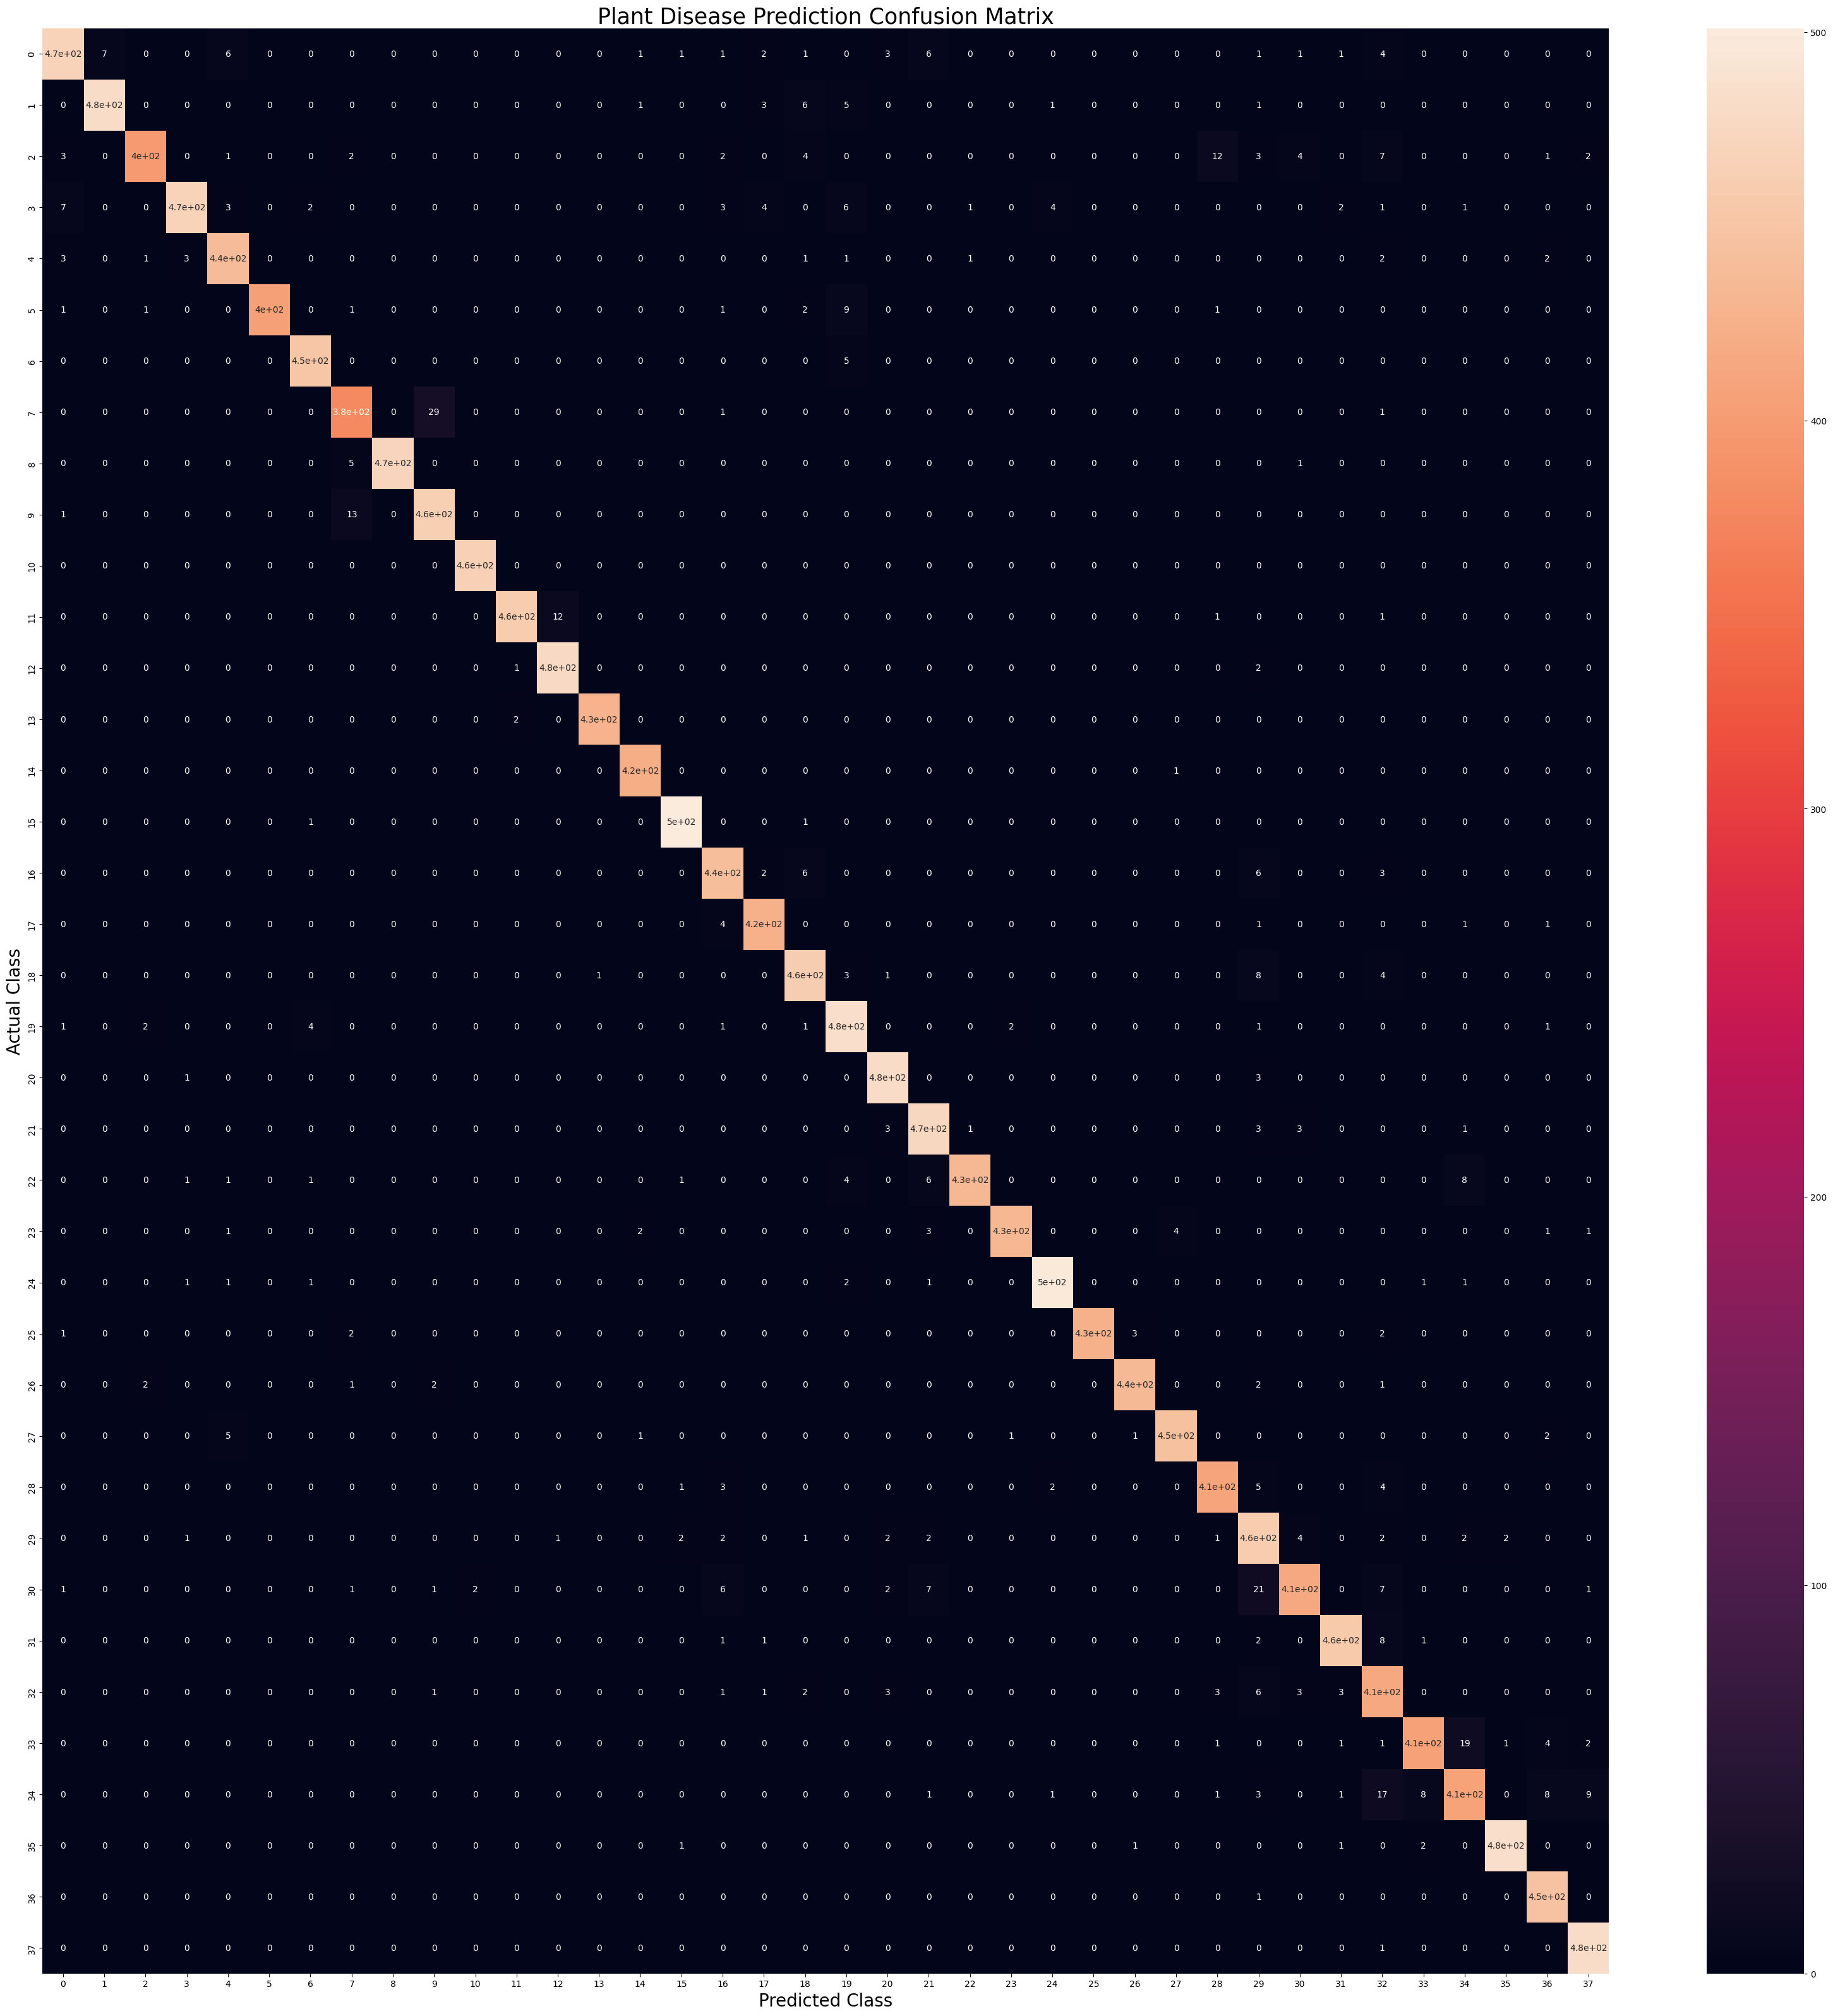

In [49]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [50]:
model.save('trained_model.h5')

c:\Users\Nishant\.conda\envs\MachineLearning\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
